11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


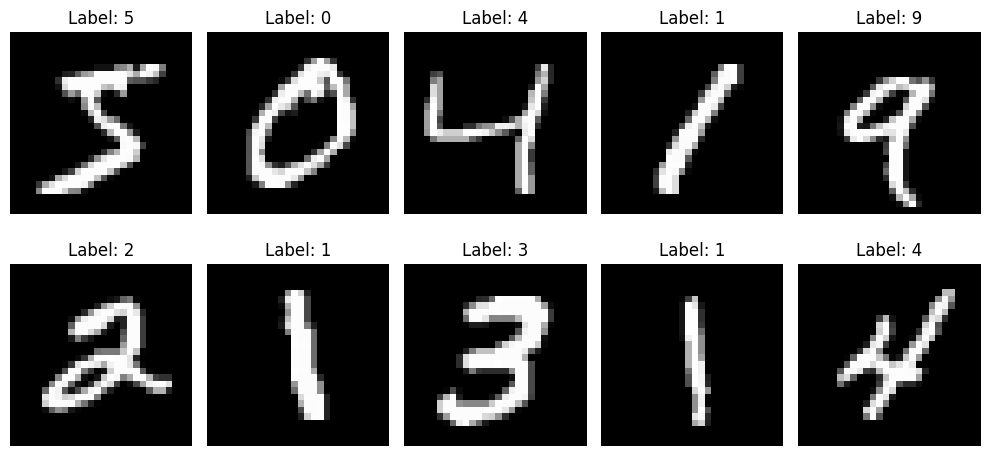

In [ ]:
# Step 2: Load MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show dataset shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Visualize a few sample images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Step 3: Preprocessing

# Normalize the pixel values to [0,1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to add channel dimension (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Confirm the new shape
print("New training data shape:", x_train.shape)
print("New test data shape:", x_test.shape)


New training data shape: (60000, 28, 28, 1)
New test data shape: (10000, 28, 28, 1)


In [ ]:
# Step 4: Build the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the Model

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,  # Use 10% of training data for validation
                    verbose=2)


Epoch 1/10
422/422 - 45s - 107ms/step - accuracy: 0.9048 - loss: 0.3133 - val_accuracy: 0.9820 - val_loss: 0.0615
Epoch 2/10
422/422 - 42s - 100ms/step - accuracy: 0.9704 - loss: 0.1013 - val_accuracy: 0.9862 - val_loss: 0.0465
Epoch 3/10
422/422 - 82s - 194ms/step - accuracy: 0.9782 - loss: 0.0736 - val_accuracy: 0.9880 - val_loss: 0.0390
Epoch 4/10
422/422 - 82s - 194ms/step - accuracy: 0.9817 - loss: 0.0609 - val_accuracy: 0.9902 - val_loss: 0.0365
Epoch 5/10
422/422 - 42s - 99ms/step - accuracy: 0.9846 - loss: 0.0524 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 6/10
422/422 - 42s - 100ms/step - accuracy: 0.9871 - loss: 0.0441 - val_accuracy: 0.9918 - val_loss: 0.0318
Epoch 7/10
422/422 - 82s - 193ms/step - accuracy: 0.9884 - loss: 0.0390 - val_accuracy: 0.9922 - val_loss: 0.0301
Epoch 8/10
422/422 - 82s - 194ms/step - accuracy: 0.9886 - loss: 0.0361 - val_accuracy: 0.9920 - val_loss: 0.0297
Epoch 9/10
422/422 - 82s - 194ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0

In [ ]:
# Step 6: Evaluate the Model

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


313/313 - 3s - 10ms/step - accuracy: 0.9922 - loss: 0.0269

Test Accuracy: 0.9922


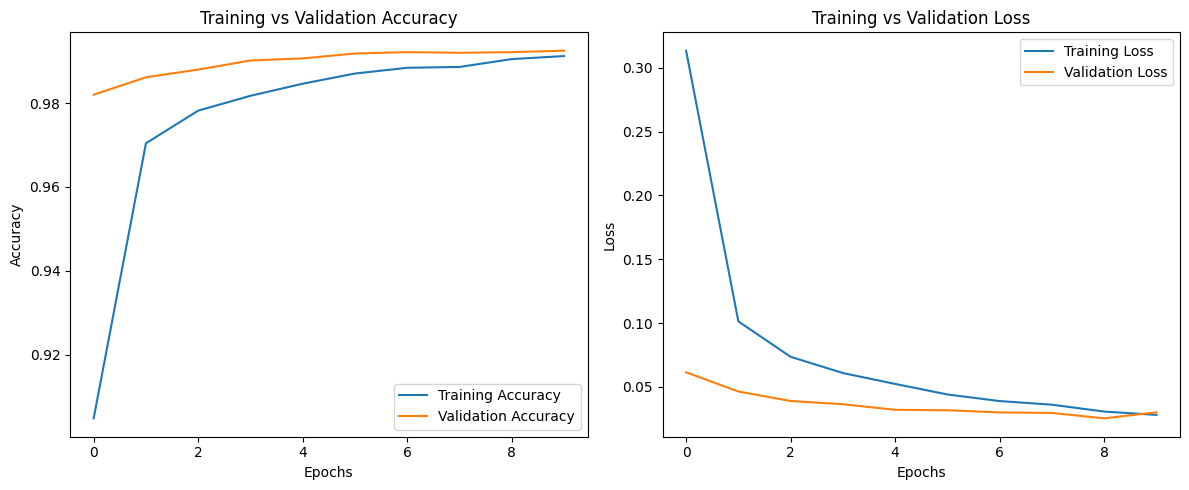

In [ ]:
# Step 7: Visualization

import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Step 8: Save the trained model

model.save('handwritten_digit_cnn_model.h5')

print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


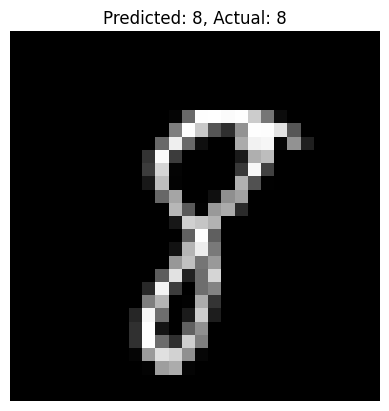

Predicted: 8, Actual: 8


In [ ]:
# Step 9: Predict on New Images

# Pick a random test image
import random
index = random.randint(0, len(x_test)-1)

# Predict the digit for this image
sample_image = x_test[index:index+1]  # Select one image
predicted_label = model.predict(sample_image)
predicted_digit = np.argmax(predicted_label)

# Display the image and prediction
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {y_test[index]}")
plt.axis('off')
plt.show()

print(f"Predicted: {predicted_digit}, Actual: {y_test[index]}")


In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the trained model
model = load_model('handwritten_digit_cnn_model.h5')

# Function to predict digit
def predict_digit(image):
    image = np.expand_dims(image, -1)
    image = image.astype('float32') / 255.0
    prediction = model.predict(np.array([image]))
    return np.argmax(prediction)

# Streamlit UI
st.title("Handwritten Digit Recognition")
st.write("Upload an image of a handwritten digit (28x28 grayscale).")

# Image upload
uploaded_image = st.file_uploader("Choose an image...", type="jpg")

if uploaded_image is not None:
    img = plt.imread(uploaded_image)
    st.image(img, caption="Uploaded Image", use_column_width=True)
    st.write("")

    # Preprocess and predict
    processed_image = np.resize(img, (28, 28, 1))
    predicted_digit = predict_digit(processed_image)
    st.write(f"Predicted digit: {predicted_digit}")


Writing app.py


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.57.81:8501

  Stopping...
  Stopping...
